In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/home/hamza/Downloads/DataSets/ratings_Beauty.csv')

print(df.shape)
print(df.head())

(2023070, 4)
           UserId   ProductId  Rating   Timestamp
0  A39HTATAQ9V7YF  0205616461     5.0  1369699200
1  A3JM6GV9MNOF9X  0558925278     3.0  1355443200
2  A1Z513UWSAAO0F  0558925278     5.0  1404691200
3  A1WMRR494NWEWV  0733001998     4.0  1382572800
4  A3IAAVS479H7M7  0737104473     1.0  1274227200


In [14]:
popular_products = pd.DataFrame(df.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating',ascending = False)
print(most_popular.head(10))

            Rating
ProductId         
B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
B000ZMBSPE    2041
B003BQ6QXK    1918
B004OHQR1Q    1885
B00121UVU0    1838
B000FS05VG    1589


<AxesSubplot:xlabel='ProductId'>

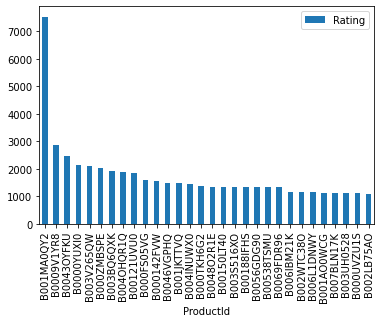

In [22]:
most_popular.head(30).plot.bar()

In [32]:
df_subset = df.head(10000)

df_subset_pivot = df_subset.pivot_table(index = 'UserId', columns = 'ProductId', values = 'Rating', fill_value = 0)

print(df_subset_pivot.head())
print('-------------------------------------------------------------------------')
print('shape:',df_subset_pivot.shape)

ProductId              0205616461  0558925278  0733001998  0737104473  \
UserId                                                                  
A00205921JHJK5X9LNP42           0           0           0           0   
A024581134CV80ZBLIZTZ           0           0           0           0   
A03056581JJIOL5FSKJY7           0           0           0           0   
A03099101ZRK4K607JVHH           0           0           0           0   
A0505229A7NSH3FRXRR4            0           0           0           0   

ProductId              0762451459  1304139212  1304139220  130414089X  \
UserId                                                                  
A00205921JHJK5X9LNP42           0           0           0           0   
A024581134CV80ZBLIZTZ           0           0           0           0   
A03056581JJIOL5FSKJY7           0           0           0           0   
A03099101ZRK4K607JVHH           0           0           0           0   
A0505229A7NSH3FRXRR4            0           0     

In [35]:
from sklearn.decomposition import TruncatedSVD

X = df_subset_pivot.T

SVD = TruncatedSVD(n_components = 10)
decomposite_metrix = SVD.fit_transform(X)

print(decomposite_metrix.shape)

(886, 10)


In [39]:
corr_metrix = np.corrcoef(decomposite_metrix)

print(corr_metrix.shape)

(886, 886)


In [42]:
# let customer buys Product ID # 6117036094.

names = list(X.index)
product_ID = names.index('6117036094')
print(product_ID)

99


In [44]:
corr_with_product = corr_metrix[product_ID]

print(corr_with_product.shape)

(886,)


In [48]:
high_corr_with_product = list(X.index[corr_with_product > .90])
high_corr_with_product.remove('6117036094')

print(high_corr_with_product[0:9])

['0733001998', '0737104473', '0762451459', '1304482634', '1304511073', '1304511081', '1304511138', '1304511146', '1304622193']


In [55]:
# now we can difine a function that take (Product ID) and return (the most 10 Products IDs) that have high corr.
def Recommendation(i):
    names = list(X.index)
    product_ID = names.index(i)
    
    corr_with_product = corr_metrix[product_ID]
    high_corr_with_product = list(X.index[corr_with_product > .90])
    high_corr_with_product.remove(i)
    
    return high_corr_with_product[0:9]

In [57]:
Recommendation('1304482634')

['0733001998',
 '0737104473',
 '0762451459',
 '1304511073',
 '1304511081',
 '1304511138',
 '1304511146',
 '1304622193',
 '1304622223']

## Applicable when business is setting up its E-commerce website for the first time

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

df = pd.read_csv('/home/hamza/Downloads/DataSets/product_descriptions.csv')

print(df.head())
print('-----------------------------------------------------------------')
print(df.shape)

   product_uid                                product_description
0       100001  Not only do angles make joints stronger, they ...
1       100002  BEHR Premium Textured DECKOVER is an innovativ...
2       100003  Classic architecture meets contemporary design...
3       100004  The Grape Solar 265-Watt Polycrystalline PV So...
4       100005  Update your bathroom with the Delta Vero Singl...
-----------------------------------------------------------------
(124428, 2)


In [95]:
df_subset = df.head(500)

tfidf = TfidfVectorizer(stop_words = 'english')
X = tfidf.fit_transform(df_subset['product_description'])
plt.show()

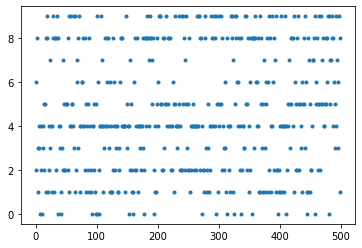

In [96]:
kmeans = KMeans(n_clusters = 10)
kmeans_y = kmeans.fit_predict(X)

plt.plot(kmeans_y, '.')
plt.show()

In [97]:
# optimal cluster

def print_clusters(i):
    print('cluster:'+ str(i))
    for c in centers[i, :10]:
        print(terms[c])
        
model = KMeans(n_clusters = 10 ,init='k-means++', max_iter=100, n_init=1, random_state = 0)
model.fit(X)

centers = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names()

print('most terms per clusters: ')
for i in range(10):
    print_clusters(i)

most terms per clusters: 
cluster:0
metal
tap
drill
barrel
hex
point
gauge
steam
fastening
thicker
cluster:1
air
light
ft
power
use
installation
control
fan
led
provides
cluster:2
wood
wall
outdoor
use
ft
vary
finish
tape
indoor
tile
cluster:3
toilet
flush
bowl
gal
water
piece
watering
offers
design
azek
cluster:4
water
heater
tank
year
easy
valve
warranty
gas
volt
snow
cluster:5
insulation
ladder
cover
attic
door
frame
fiberglass
easy
roller
pull
cluster:6
cutting
saw
tool
motor
power
blade
guard
grip
steel
amp
cluster:7
storage
shelves
easy
lbs
adjustable
duty
steel
heavy
finish
shelf
cluster:8
patio
frame
bronze
fabric
collection
dining
cushions
canopy
wicker
base
cluster:9
natural
bamboo
window
shades
wood
privacy
ft
fencing
size
order


/home/hamza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [98]:
def Show_Recommendation(product):
    
    product = tfidf.transform([product])
    prediction = model.predict(product) 
    
    return print_clusters(prediction[0])

In [99]:
Show_Recommendation('window')

cluster:9
natural
bamboo
window
shades
wood
privacy
ft
fencing
size
order


In [91]:
Show_Recommendation('warranty')

cluster:4
water
heater
tank
year
easy
valve
warranty
gas
volt
snow
